# Field Strength

This is a short notebook that calculates the field strength as a function of volume for various energies. This should illustrait how chaging energy and volume affects field strength.

## Defining units

We adopt Hartree atomic units where:

- Unit energy is Hartree $E_h$
- Unit length is bohr radius $a_0$ where $1nm = 18.8973 a_0$
- Unit Permittivity is $e^2/a_0E_h= 4\pi \epsilon_0$

## Parameter Space to Plot

We plot the following energies:

- $1eV= 0.0367493 Eh$
- $5eV = 0.183747 Eh$
- $15eV = 0.55124 Eh$

Over a volume range of $[10nm^3,600nm^3]=[67483.76 a_0^3,4049025.61 a_0^3]$. 

**Note that blue light is around 500nm and red light is around 600nm**

In [1]:
import numpy as np

nm_in_hartree = 18.8973
epsilon_naught_in_hartree = 1.0/(np.pi*4)

energy_1 = 0.0367493 #Eh
energy_2 = 0.183747 #Eh
energy_3 = 0.55124 #Eh
volumes_nm_cubed = np.linspace(10,600,200)
volumes_a0_cubed = volumes_nm_cubed*nm_in_hartree**3

#make sure that volume bounds are what we expect
np.testing.assert_approx_equal(volumes_a0_cubed[0],67483.76,significant=6)
np.testing.assert_approx_equal(volumes_a0_cubed[-1],4049025.61,significant=8)

## Field Strength Equation

Given an index $\mathbf k$ for a mode with energy $\hbar \nu_k$ in vacuum confined to volume $V$, we wish to find the strength of the field. This is given by the equation 1.1.20 of Scully and Zubairy, Quantum Optics.:

$$
\mathcal E_\mathbf k = \left(\frac{\hbar \nu_k }{2\epsilon_0 V} \right)^{1/2}
$$

`Scully, Marlan O., and M. Suhail Zubairy. Quantum Optics. Cambridge University Press, 1997. https://doi.org/10.1017/CBO9780511813993.`

We impliment the equation in our package. Thus we import it below and plot it over our previously defined parameters.


In [3]:
from wang_2021.field_equations import field_strength_of_mode



strengths = [field_strength_of_mode(energy=energy_x,
                                    volume=volumes_a0_cubed,
                                    epsilon=epsilon_naught_in_hartree)
            for energy_x in [energy_1,energy_2,energy_3]
]

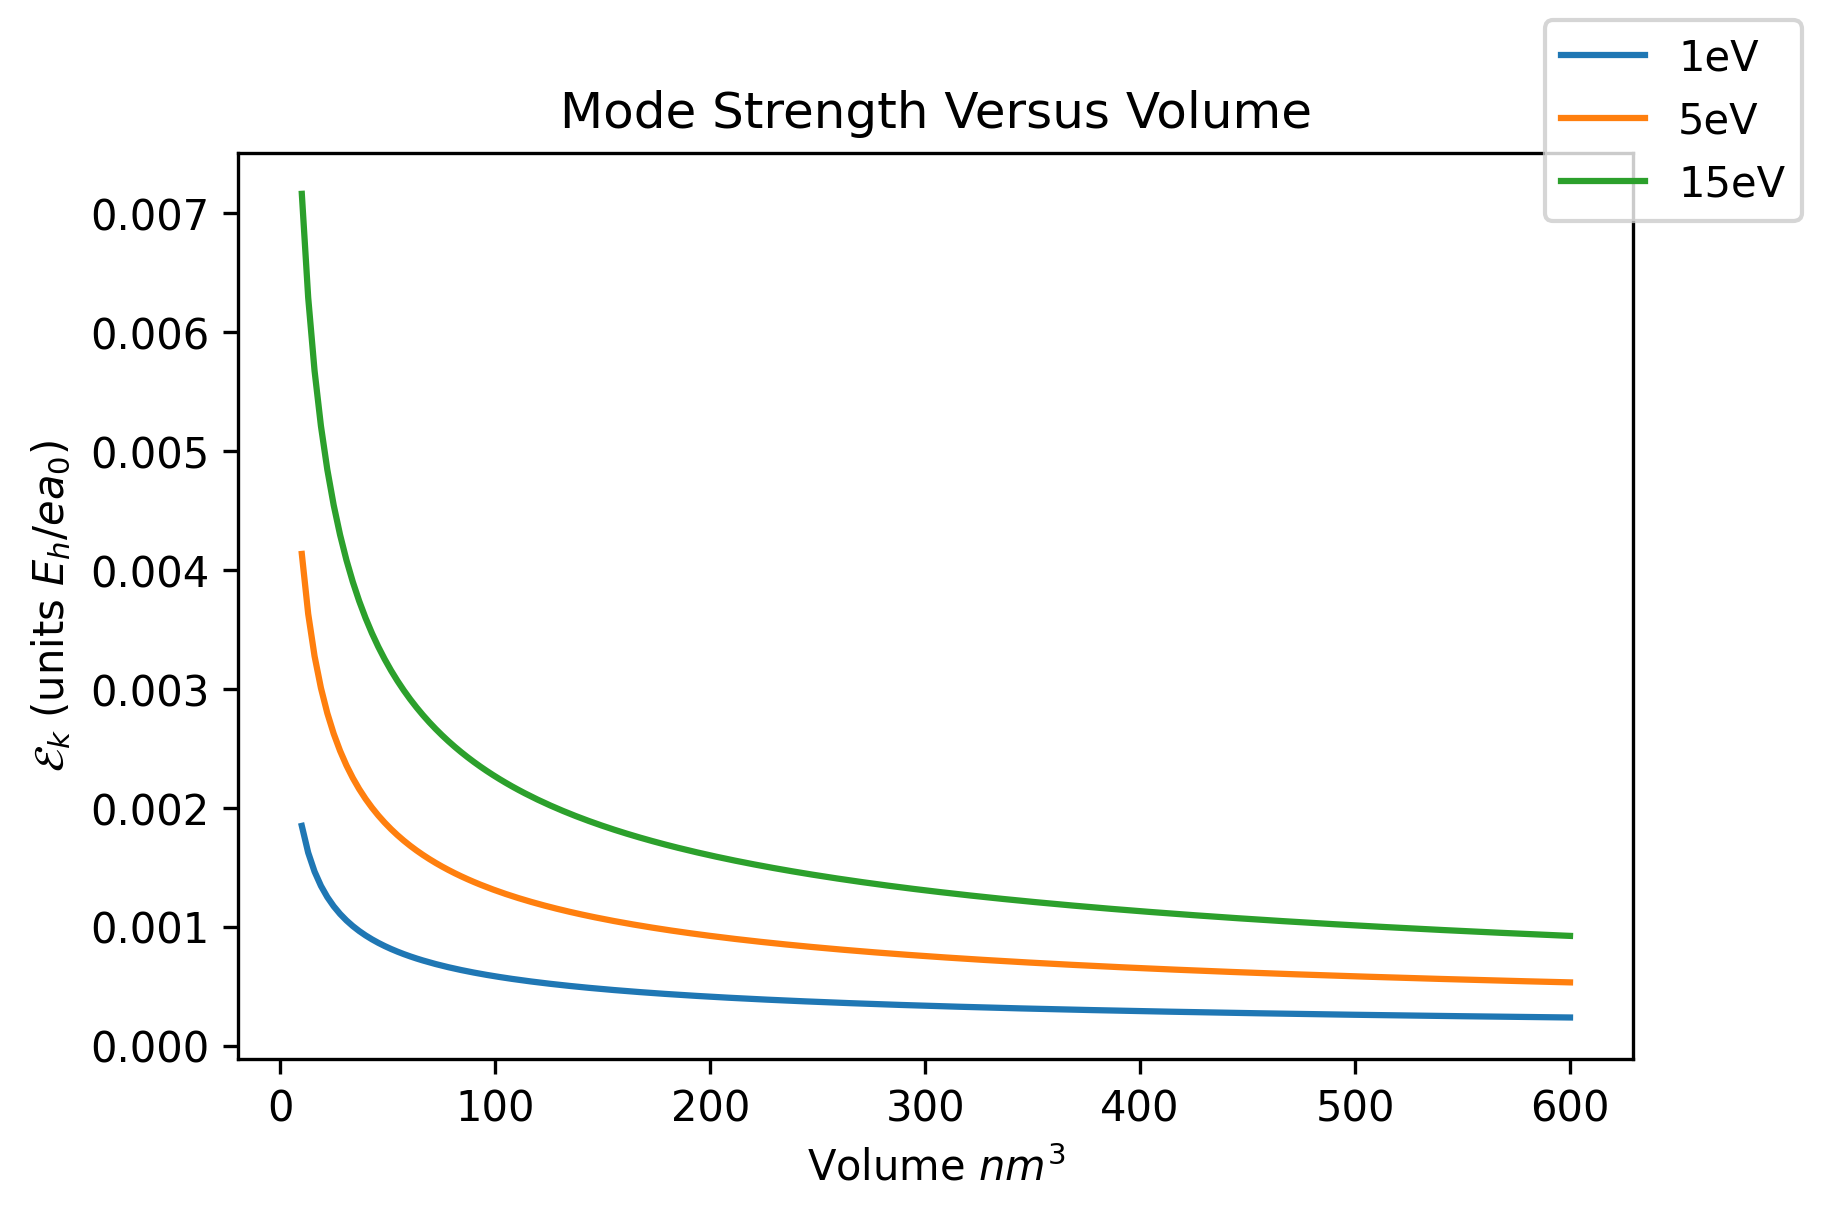

In [33]:
fig = plt.figure(dpi=300)

plt.plot(volumes_nm_cubed,strengths[0],label='1eV')
plt.plot(volumes_nm_cubed,strengths[1],label='5eV')
plt.plot(volumes_nm_cubed,strengths[2],label='15eV')
fig.get_axes()[0].set_xlabel('Volume $nm^3$')
fig.get_axes()[0].set_ylabel('$\mathcal{E}_{k}$ (units $E_h/ea_0$)')
fig.get_axes()[0].set_title('Mode Strength Versus Volume')
fig.legend()

plt.show()
